(ch:sampling-distribution)=
# 표본분포(준비중)

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

표본 분포의 주요 개념을 소개한다.

- 독립동일분포
- 정규분포 연산
- 표본평균의 분포
- 중심극한정리
- 큰 수의 법칙

## 독립성과 상관성

### 독립성

확률변수 $X$와 $Y$가 서로 어떤 영향도 끼치지 않을 때 상호 독립이라 한다.
수식으로 표혀하면 다음 수식이 성립할 때 두 확률변수가 상호 독립이라 정의한다.

$$
f_{XY}(x, y) = f_X(x) \cdot f_Y(y)
$$

위 수식에서 $f_X$와 $f_Y$ 는 각각 $X$와 $Y$에 대한 주변확률을 계산하는 함수를 가리킨다.
$X$와 $Y$가 이산확률변수인 경우 주변화률질량함수는 다음과 같이 정의된다.

$$
f_X(x) = \sum_k f_{XY}(x, y_k) \qquad f_Y(y) = \sum_n f_{XY}(x_n, y)
$$

$x_n$과 $y_k$는 각각 확률변수 $X$와 $Y$가 가리킬 수 있는 유한개의 값을 나타낸다.

**예제**

예를 들어 $X$는 공정한 주사위를 던져서 나오는 값을 가리키는 확률변수라 하자.
$X$의 확률분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

반면에 $Y$는 아래 확률분포를 갖는 불공적한 주사위를 던져서 나오는 값을 가리키는 확률 변수라 하자.

| Y | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/21 | 2/21 | 3/21 | 4/21 | 5/21 | 6/21 |

공정한 주사위와 불공정한 주사위를 동시에 던져서 나오는 값의 튜플을 가리키는
결합확률변수 $(X, Y)$의 결합확률질량함수의 결합확률질량함수는 다음과 같다.

In [8]:
def f_XY(x, y):
    if y in range(1, 7):
        return (1/6) * (y/21) # x의 확률은 항상 1/6
    else:
        return 0

확률변수 각각에 대한 주변확률질량함수를 `f_XY()`를 이용하여 정의해보자.

- $X$에 대한 주변확률질량함수

In [9]:
def f_X(x):
    y_probs = [f_XY(x, y) for y in range(1, 7)]
    return np.sum(y_probs)

- $Y$에 대한 주변확률질량함수

In [10]:
def f_Y(y):
    x_probs = [f_XY(x, y) for x in range(1, 7)]
    return np.sum(x_probs)

아래 코드가 두 확률변수의 독립성을 확인해준다

In [11]:
xy = [f_XY(x, y) for x in range(1, 7) for y in range(1, 7)]
xMy = [f_X(x) * f_Y(y) for x in range(1, 7) for y in range(1, 7)]
np.allclose(xy, xMy)

True

### 독립성 대 무상관성

확률변수 $X$와 $Y$가 상호 독립이면 두 확률변수 사이에 어떠한 상관성도 존재하지 않는다.
예를 들어, 결합확률분포의 공분산과 상관계수도 0이 된다.
여기서는 두 개의 이산 확률변수 $X$와 $Y$로 구성된 결합확률변수 $(X, Y)$를 
이용하여 독립성과 무상관성을 설명한다. 

$(X, Y)$의 확률질량함수를 $f_{XY}$ 할 때 각 확률변수에 대한 
주변확률질량함수, 기댓값, 분산과
두 확률변수의 선형 상관관계를 측정하는 공분산과 피어슨 상관계수는
아래와 같이 정의된다.

- 기댓값

$$
\begin{align*}
E[X] &= \sum_n x_n\, f_X(x_n) = \sum_n x_n\, \sum_k f_{XY}(x_n, y_k)\\[.5ex] 
E[Y]&= \sum_k y_k\, f_Y(y_k) = \sum_k y_k\, \sum_n f_{XY}(x_n, y_k)\\[.5ex]
\end{align*}
$$

- 분산

$$
\begin{align*}
Var(X) &= \sum_n (x_n-E[X])^2\, f_X(x_n)\\[.5ex] 
Var(Y) &= \sum_k (y_k-E[Y])^2\, f_Y(y_k)\\[.5ex] 
\end{align*}
$$

- 공분산과 피어슨 상관계수

$$
\begin{align*}
Cov[X, Y] &= \sum_n\sum_k (x_n-E[X])\, (y_k-E[Y]) \, f_{XY}(x_n, y_k)\\[1ex]
Corr[X, Y] &= \frac{Cov[X, Y]}{\sqrt{Var(X)\, Var(Y)}}\
\end{align*}
$$

**독립이면 무상관이다!**

아래 식은 두 확률변수가 상호 독립이면 공분산이 0임을 증명한다.

$$
\begin{align*}
Cov[X, Y] &= \sum_n\sum_k (x_n - E[X])\, (y_k - E[Y]) \, f_{XY}(x_n, y_k)\\[1ex]
 &= \sum_n\sum_k (x_n - E[X])\, (y_k - E[Y]) \, f_n(x_n)\, f_{Y}(y_k)\\[1ex]
 &= \sum_n\big( (x_n - E[X])\, f_n(x)\, \sum_k (y_k - E[Y]) \, f_{Y}(y_k)\big )\\[1ex]
 &= 0
\end{align*}
$$

위 수식에서 마지막줄이 0인 이유는 바로 윗줄에 포함된 아래 수식이 0으로 계산되기 때문이다.

$$
\begin{align*}
\sum_k (y_k-E[Y]) \, f_{Y}(y_k) &= \sum_k y \, f_{Y}(y_k) - \sum_k E[Y] \, f_{Y}(y_k) \\[.5ex]
    &= E[Y] - E[Y] \, \sum_k f_{Y}(y_k) \\[.5ex]
    &= E[Y] - E[Y] \\[.5ex]
    &= 0
\end{align*}
$$

실제로 공정한 주사위를 던진 결과와 불공정한 주사위를 던진 결과의 공분산은 0으로 계산된다.
공분산이 0이면 피어슨 상관계수다 당연히 0이다.

- $X$의 기댓값: $E[X]$

In [54]:
E_X = np.sum([x * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_X

3.500000

- $Y$의 기댓값: $E[Y]$

In [55]:
E_Y = np.sum([y * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_Y

4.333333

- $X$와 $Y$의 공분산

In [56]:
np.sum([(x-E_X)*(y-E_Y)*f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])

-0.000000

**무상관이지만 독립이 아닐 수 있다!**

(준비중 ...)

단, 두 정규분포의 결확 확률분포의 경우에는 공분산이 0이면 두 분포가 상호 독립임의 의미한다.
증명은 생략한다.

## 확률분포 연산과 선형변환

(준비중...)

### 정규분포 합과 차

상호 독립인 확률변수 $X$와 $Y$가 정규분포를 따른다고 가정한다.

$$
X \sim N(\mu_X, \sigma_X^2) \qquad Y \sim N(\mu_y, \sigma_y^2)
$$

그러면 두 확률 번수의 합과 차를 확률변수 $X+Y$와 $X-Y$ 모두 정규분포를 따르며
두 분포가 따르는 정규분포는 다음과 같다.

$$
X+Y \sim N(\mu_X+\mu_Y,\sigma_{X}^{2}+\sigma_{Y}^{2}) \qquad X-Y \sim N(\mu_X-\mu_Y,\ \sigma_{X}^{2}+\sigma_{Y}^{2})
$$

즉, $X+Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 합과 분산의 합으로,
$X-Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 차와 분산의 합으로 계산된다.
$X+Y$와 $X-Y$의 분산이 두 확률변수 각각의 분산의 합으로 계산되는 이유를 직관적으로 설명하기 위해
다음 두 예제를 이용한다.

**예제: 남성, 여성 체중의 합의 분포**

2024년도 기준 한국 20대 남성, 여성의 체중 분포 $X$와 $Y$는 다음과 같다.

$$
X \sim N(76.59, 11.73^2) \qquad Y \sim N(58.17, 9.28^2)
$$

남성과 여성의 체중은 상호 독립이라고 가정했을 때 남성과 여성의 체중의 합은
다음 분포를 따라야 한다. 

$$
X+Y \sim N(134.76, 14.96^2)
$$

위 사실을 코드로 확인해보기 위해 언급된
평균값과 표준편차를 갖는 남성과 여성의 체중 데이터를 
각각 1천개씩 무작위로 생성한다.

In [19]:
from scipy.stats import norm

- 남녀 체중의 평균값과 표준편차 지정

In [20]:
mu_men = 76.59
sigma_men = 11.73

mu_wemen = 58.17
sigma_wemen = 9.28

- 평균값의 합과 차, 분산 합의 제곱근값 계산

In [21]:
mu_sum = mu_men + mu_wemen
mu_diff = mu_men - mu_wemen

sigma_sum = np.sqrt(sigma_men**2 + sigma_wemen**2)

In [22]:
print("평균값 합:", mu_sum)

평균값 합: 134.76


In [23]:
print("평균값 차:", mu_diff)

평균값 차: 18.42


In [24]:
print("분산 합의 제곱근:", sigma_sum)

분산 합의 제곱근: 14.956981647377923


- 남성, 여성, 합, 차의 정규분포 지정

In [25]:
X_men = norm(mu_men, sigma_men)
Y_wemen = norm(mu_wemen, sigma_wemen)

X_sum = norm(mu_sum, sigma_sum)
X_diff = norm(mu_diff, sigma_sum)

- 남녀 각각 1천개 데이터 무작위 생성. 단, 지정된 정규분포 활용.

In [26]:
data_men = X_men.rvs(size=1000)
data_wemen = Y_wemen.rvs(size=1000)

- 생성된 남녀 데이터

In [27]:
data = pd.DataFrame({'Men': data_men, 'Wemen':data_wemen})
data

,Men,Wemen
0,64.324674,63.357087
1,28.979551,71.408221
2,94.347194,60.304222
3,71.269956,65.269945
4,79.505346,46.071701
...,...,...
995,77.932395,75.684032
996,76.860792,39.921671
997,70.352520,63.280912
998,67.932152,44.137290


- 남녀 데이터 합과 차 데이터 추가

In [28]:
data['Men+Wemen'] = data_men + data_wemen
data['Men-Wemen'] = data_men - data_wemen
data

,Men,Wemen,Men+Wemen,Men-Wemen
0,64.324674,63.357087,127.681761,0.967586
1,28.979551,71.408221,100.387772,-42.428670
2,94.347194,60.304222,154.651415,34.042972
3,71.269956,65.269945,136.539901,6.000011
4,79.505346,46.071701,125.577047,33.433646
...,...,...,...,...
995,77.932395,75.684032,153.616427,2.248364
996,76.860792,39.921671,116.782463,36.939120
997,70.352520,63.280912,133.633431,7.071608
998,67.932152,44.137290,112.069442,23.794862


- 생성된 데이터셋의 평균값, 표준편차 확인

In [29]:
data.describe()

,Men,Wemen,Men+Wemen,Men-Wemen
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.509686,58.155568,134.665254,18.354117
std,12.305241,9.498373,15.485032,15.604162
min,28.979551,26.035263,93.456421,-42.428670
25%,68.267892,51.759642,124.155131,7.565794
50%,76.681347,58.627507,135.090824,17.815871
75%,84.854034,64.412561,146.149454,28.698484
max,119.685471,86.196387,183.448573,67.674169


정규분포를 따르는 데 확률변수의 합과 차 데이터또한 
이론적으로 추청된 평균값과 표준편차를 갖는 정규분포를 따른다.
아래 코드는 이를 그래프로 확인해준다.

- 합 데이터 분포 그래프

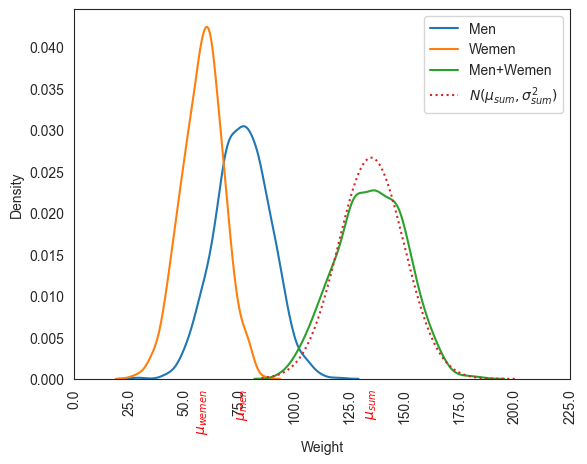

In [30]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men+Wemen'], label='Men+Wemen')

x = np.arange(85, 200, 0.01)
ax.plot(x, X_sum.pdf(x), linestyle=':', label=r'$N(\mu_{sum}, \sigma_{sum}^2)$')

x_ticks = np.append(ax.get_xticks(), [mu_men, mu_wemen, mu_sum])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{sum}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

- 차 데이터 분포 그래프

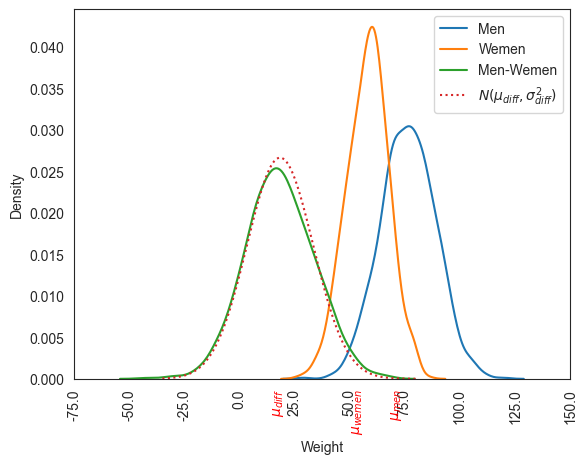

In [31]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men-Wemen'], label='Men-Wemen')

x = np.arange(-35, 80, 0.01)
ax.plot(x, X_diff.pdf(x), linestyle=':', label=r'$N(\mu_{diff}, \sigma_{diff}^2)$')

x_ticks = np.append(ax.get_xticks(), [71.2, 53.7, 17.5])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{diff}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

### 독립성의 중요성

$X$와 $Y$가 상호 독립이지 않으면 정규분포의 합과 차가 정규분포를 따르지 않을 수 있다.
설명을 위해 {numref}`%s장 <ch:normal-distribution>`에서 소개한
피어슨의 아버지와 아들의 키 데이터셋을 활용한다.
이유는 아들 키는 아버지의 키 유전자에 많은 영향을 받아 절대로 독립적일 수 없기 때문이다.

아래 코드는 피어슨<font size='2'>Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [32]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [33]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**아버지 키와 아들 키의 상관관계**

예상대로 아버지 키와 아들 키 데이터의 공분산이 0이 아니다.

In [34]:
pearson.cov(ddof=0)

,Father,Son
Father,48.612085,24.984513
Son,24.984513,51.125832


피어슨 상관계수를 보면 0.5 정도로 상당히 높은 편이다.
아버지 키가 아들 키에 많은 영향을 준다는 것이 확실하다.

In [35]:
pearson.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


결론적으로 두 데이터는 상호 독립이 절대로 아니다.
실제로 아버지키와 아들 키의 합은 정규분포를 따르지 않음을
아래 코드가 보여준다.

In [36]:
pearson['Father+Son'] = pearson['Father'] + pearson['Son']

pearson_desc = pearson.describe()
pearson_desc

,Father,Son,Father+Son
count,1078.000000,1078.000000,1078.000000
mean,171.922635,174.457978,346.380612
std,6.975473,7.153552,12.241158
min,149.900000,148.600000,307.800000
25%,167.100000,169.900000,338.025000
50%,172.200000,174.200000,346.400000
75%,176.800000,179.100000,354.800000
max,191.500000,199.100000,381.000000


평균값의 합은 유지된다.

In [37]:
mu_FS = pearson_desc.loc['mean', 'Father'] + pearson_desc.loc['mean', 'Son']
mu_FS

346.380612

그런데 합의 분산이 두 분산의 합과 다르다.

- 분산의 합

In [38]:
sigma_FS_squared = pearson_desc.loc['std', 'Father'] ** 2 + pearson_desc.loc['std', 'Son'] ** 2
sigma_FS_squared

99.830524

- 이론적인 아버지 키와 아들 키의 합의 표준편차

In [39]:
sigma_FS = np.sqrt(sigma_FS_squared)
sigma_FS

9.991523

이론과 실제 계산된 표준편차가 많이 다르다.

- 실제 아버지 키와 아들 키의 합의 표준편차

In [40]:
sigma_FaddS = pearson_desc.loc['std', 'Father+Son']
sigma_FaddS

12.241158

데이터의 분포를 그래프로 그려보면 합의 분포가 정규분포가 아님을 
보다 명확하게 확인할 수 있다.

- (아버지 키 + 아들 키)의 이론적 정규분포

In [41]:
from scipy.stats import norm

X_FS = norm(mu_FS, sigma_FS)

- 확률 밀도 함수 그래프로 구분하기

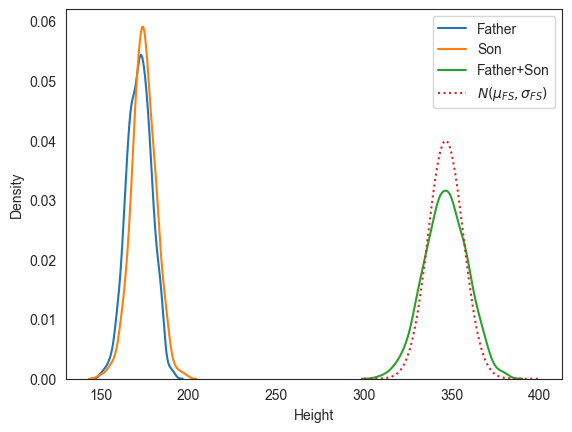

In [42]:
fig, ax = plt.subplots()

# KDE 기법으로 계산된 확률 밀도 함수 그래프
# 아버지 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Father'], label='Father')
# 아들 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Son'], label='Son')
# (아버지 키+아들 키)의 실제 분포: 정규분포 아님
sns.kdeplot(ax=ax, data=pearson['Father+Son'], label='Father+Son')

# (아버지 키+아들 키)의 이론적 정규분포
x = np.linspace(300, 400, 100)
ax.plot(x, X_FS.pdf(x), linestyle=':', label=r'$N(\mu_{FS}, \sigma_{FS})$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()
plt.show()

## 표본평균의 분포

**독립동일분포**

확률론에서 **독립동일분포**는 특정 확률분포를 따르는 데이터셋에서 무작위로 표본을 독립적으로 여러 번 추출해서 얻어진 값들로 구성된 데이터를 가리키는 다차원 확률변수를 의미한다.
독립동일분포는 보통 'independently and identically distributed'의 표현의 줄임말인 **iid**로 불린다.

예를 들어 동일한 주사위를 10 번 던져서 나온 값들로 구성된 튜플,
무작위로 선택된 100명에게 물은 동일한 질문에 대한 답으로 구성된 튜플 등을
가리키는 확률변수가 대표적인 독립동일분포다.
단, 다음 사항에 주의해야 한다.

- 주사위를 반복해서 던질 때 동일 조건에서 반복되어야 함. 
- 무작위로 선택된 사람의 답변이 다른 사람의 답변과 어떤 영향도 주고받지 않아야 함.

**표본평균의 분포**

독립동일분포를 따르는 확률변수 $X_1, X_2, \cdots, X_n$의 평균값이 따르는 분포가
**표본평균의 분포**다.
즉, 아래와 같이 정의된 확률변수 $\overline{X}$의 확률분포를 가리킨다.

$$
\overline{X} = \frac{X_1 + X_2 + \cdots + X_n}{n}
$$

기댓값과 분산은 다음과 같이 계산된다.

- 표본평균의 기댓값

$$
\begin{align*}
E[\overline{X}] &= E \left[ \frac{X_1 + X_2 + \cdots + X_n}{n} \right] \\[2ex]
    &= \frac{E[X_1] + E[X_2] + \cdots + E[X_n]}{n} \\[1.5ex]
    &= \frac{n \mu}{n} \\[1ex]
    &= \mu
\end{align*}
$$

- 표본평균의 분산

$$
\begin{align*}
V(\overline{X}) &= V \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) \\[2ex]
    &= \frac{V(X_1) + V(X_2) + \cdots + V(X_n)}{n^2} \\[1.5ex]
    &= \frac{n \sigma^2}{n^2} \\[1ex]
    &= \frac{\sigma^2}{n}
\end{align*}
$$

## 중심극한정리

확률변수 $X_1, X_2, \cdots, X_n$가 모두 
평균값이 $\mu$이고 표주편차가 $\sigma$인  분포를 따르고 상호 독립인
독립동일분포라 하자.
그러면 $n$이 충분히 클 때 표본평균 $\overline X$의 분포는 다음 정규분포를 따른다.

$$
\overline{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right)
$$

**캘리포니아 주택가격 데이터셋**

캘리포니아 주택가격 데이터셋을 계속해서 활용한다.

- 캘리포니아 주택가격 데이터셋

In [43]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 가구중위소득과 주택중위가격만 활용

In [44]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


- 이상치 제거: 중위주택가격이 50만을 초과하는 경우 삭제. 이후 인덱스 초기화

In [45]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


In [46]:
total_number = housing.shape[0]
total_number

19675

**10% 표본추출**

In [47]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value
district,,
16102,2.9087,228200.0
202,1.4844,119400.0
19281,4.1898,359100.0
15575,2.4097,66000.0
17911,1.0667,34200.0
...,...,...
11447,3.0122,114700.0
10921,5.8623,287800.0
17830,3.5978,80600.0


**표본추출 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [48]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 표본추출:")
    print(sampling.mean())
    print()

1번째 표본추출:
median_income              3.710130
median_house_value    197194.966955
dtype: float64

2번째 표본추출:
median_income              3.682878
median_house_value    192790.798170
dtype: float64

3번째 표본추출:
median_income              3.647413
median_house_value    187759.328419
dtype: float64

4번째 표본추출:
median_income              3.615943
median_house_value    189211.336045
dtype: float64

5번째 표본추출:
median_income              3.688556
median_house_value    193514.692425
dtype: float64



In [49]:
sampling

,median_income,median_house_value
district,,
14547,4.5032,168900.0
13392,2.6477,53300.0
6865,3.5938,141100.0
10175,2.6759,120600.0
7252,3.2976,151200.0
...,...,...
19000,1.6378,60300.0
7467,4.9609,186700.0
17822,2.0469,66800.0


아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모은다.

In [50]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [51]:
np.mean(income_mean)

3.676708

표본평균의 분산이 매우 작다.

In [52]:
np.var(income_mean)

0.001254

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [53]:
housing['median_income'].mean()

3.676717

### 큰 수의 법칙

확률변수 $X_1, X_2, \cdots, X_n$가 모두 
평균값이 $\mu$이고 표주편차가 $\sigma$인  분포를 따르고 상호 독립인
독립동일분포라 하자.
그러면 $n$이 증가할 때 표본평균 $\overline X$는 모평균 $\mu$에 수렴한다.

**캘리포니아 주택가격 데이터셋**

...

## 연습문제

참고: [(연습) 표본 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling_distribution.ipynb)